In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

## Disclaimer

Dataset, ideas and tasks are obtained from this [Kaggle link](https://www.kaggle.com/jackdaoud/marketing-data?select=marketing_data.csv)

This notebook aims to give some interesting EDA and useful insights to the viewers

In [52]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

The **Income** column seems to have redundant space-character and having some null values. Let's apply some change for it. Besides, its values has special character, we replace it and convert values to float

We also fill the null values with the mean values

In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [55]:
df.rename(columns = {' Income ': 'Income'}, inplace = True)
df['Income'] = df['Income'].str.replace(r'[$,]', '', regex = True).astype('float64')

In [56]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

We have the description for each column (attribute) as follows:
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **MntWines**: Amount spent on wine in the last 2 years
- **MntFruits**: Amount spent on fruits in the last 2 years
- **MntMeatProducts**: Amount spent on meat in the last 2 years
- **MntFishProducts**: Amount spent on fish in the last 2 years
- **MntSweetProducts**: Amount spent on sweets in the last 2 years
- **MntGoldProds**: Amount spent on gold in the last 2 years
- **NumDealPurchases**: Number of purchases made with a discount
- **NumWebPurchases**: Number of purchases made through the company's web site
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company's web site in the last month
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2st campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain**: 1 if customer complained in the last 2 years, 0 otherwise
- **Country**: Customer's location

Then we can look through some statistics variable of those attributes. In fact, we just want to notice about the attributes which relate to the customer's purchase behaviour. We will look after the remains later

In [57]:
df[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0
NumWebPurchases,2240.0,4.084821,2.778714,0.0,2.00,4.0,6.00,27.0


## Section 1: Exploratory Data Analysis

First, we want to study about the education level of all customers (in real-life, this attribute contributes a major impact on the purchase behavior)

In [58]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Based on the discussion given by the Kaggle link, we assume that **Master** and **2n Cycle** are equal and **Graduation** refers to under-graduate and **Basic** refers to primary and secondary school. Hence, we have to associate this attribute with another attributes in order to make the analysis more clear

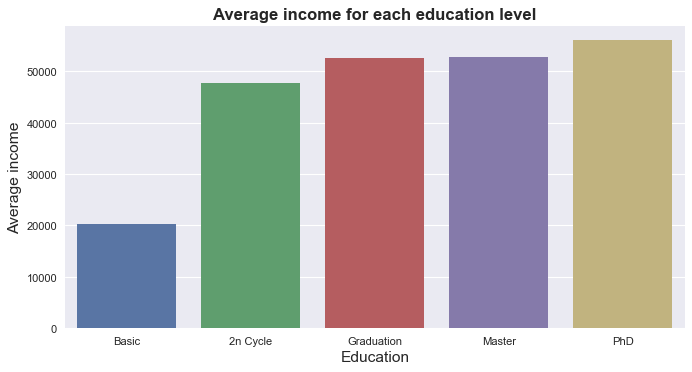

In [59]:
income_per_edu = df.groupby('Education')['Income'].mean().sort_values()
plt.figure(figsize = (10, 5), dpi = 80)
ax = sns.barplot(x = income_per_edu.index, y = income_per_edu.values)
plt.xlabel('Education', fontsize = 14)
plt.ylabel('Average income', fontsize = 14)
plt.title('Average income for each education level', fontsize = 15, fontweight = 'bold')
plt.show()

With this visualization, we can accept that this assumption is quite true, but there is a misleading: the income of **Graduation** is a bit more than **2n Cycle**

We want to provide more information about the distribution about the age ranges of the customer. Hence, we calculate their age to now.

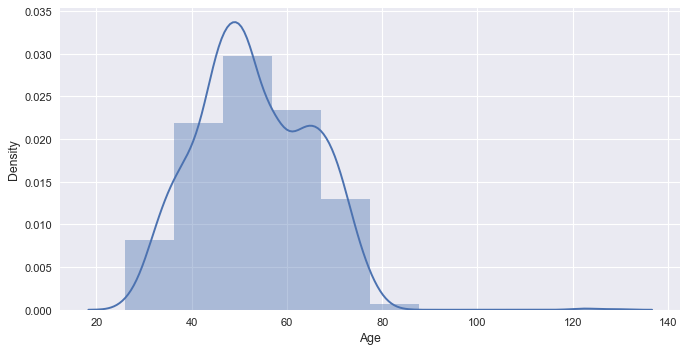

In [60]:
df['Age'] = date.today().year - df['Year_Birth']
plt.figure(figsize = (10, 5), dpi = 80)
ax = sns.distplot(df['Age'], bins = 10)

# Section 2: Statistical Analysis

### Question: What factors are significantly related to the number of store purchases?

Here, we will answer this question by building a regression model with predicting variable is **NumberStorePurchases**, and we use others variables (attributes) as dependent variables, except the variables about personal information like **ID**, **Year_Birth**. In order to obtain the importance for each variable, we use Random Forest Regressor

In [61]:
model_label = df['NumStorePurchases']

country_dummies_data = pd.get_dummies(df[['Country']])
model_data = df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']]
model_data = pd.concat([model_data, country_dummies_data], axis = 1)
model_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,AcceptedCmp3,...,Response,Complain,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,84835.0,0,0,0,189,104,379,111,189,0,...,1,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,0,...,1,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,0,...,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,1,...,1,0,0,0,0,0,0,0,1,0


Split data for the model and fit the model

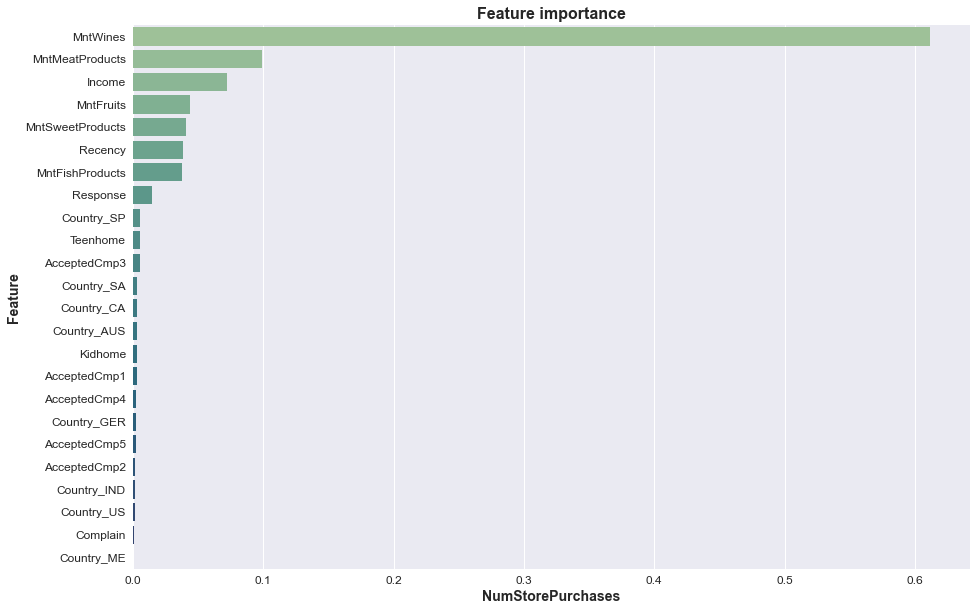

In [62]:
x_train, x_test, y_train, y_test = train_test_split(model_data, model_label, test_size = 0.15, random_state = 42)

rf_regressor = RandomForestRegressor(random_state = 1)
rf_model = rf_regressor.fit(x_train,y_train)
y_rfpred = rf_model.predict(x_test)
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x_train.columns,
                                    columns = ['importance']).sort_values('importance', ascending = False)
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = feature_importances['importance'].values, y = feature_importances['importance'].index, palette ='crest')
plt.xlabel('NumStorePurchases', fontsize = 14, fontweight = 'bold')
plt.ylabel('Feature', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature importance', fontsize = 16, fontweight = 'bold')
plt.show()

Obviously, we can compare each variable by looking through it importance in the model. Those variables representing the customer behavior (like the amount spend on a particular product) tend to have high impact to the number of store purchase. Moreover, the importance of the income is also a noticeable point

### Question: People who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

We need to divide the dataframe into 2 groups based on the details of the question. Then we try to visualize if there is a regression line between 2 attributes 

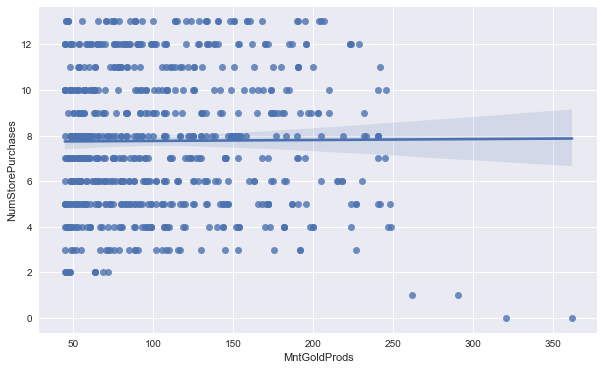

In [63]:
above_avg_gold_spending_df = df[df['MntGoldProds'] > df['MntGoldProds'].mean()] 
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.regplot(x = 'MntGoldProds', y = 'NumStorePurchases', data = above_avg_gold_spending_df)

There is a correlation. However, we must check the degree of correlation. We can check their correlation coefficient to see how tight they are

In [64]:
correlation = above_avg_gold_spending_df['MntGoldProds'].corr(above_avg_gold_spending_df['NumStorePurchases'])
correlation

0.007212290251235118

Yes, it is a positive correlation, but the impact is so small. We just can say that the people who spent above average amount in gold have a slightly effect on the number of store purchases

### Question: Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

In [65]:
married_phd_candidates_on_fish = df[(df['Marital_Status'] == 'Married') & (df['Education'] == 'PhD')]['MntFishProducts'].sum()
other_candidates_on_fish = df[(df['Marital_Status'] == 'Married') & (df['Education'] != 'PhD')]['MntFishProducts'].sum()

In [66]:
married_phd_candidates_on_fish

5187

In [67]:
other_candidates_on_fish

25382

This answer results to the rejection of the statement of the question. To see how other factors related to amount spent on fish, we use again the method applied in the question about **NumStorePurchases**, but this time we use as much variables as possible. Besides, we try to detect the multicollinearity between those variables

In [68]:
factors = df[['Income', 'Recency', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = factors.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(factors.values, i)
                          for i in range(len(factors.columns))]
  
vif_data

,Feature,VIF
0,Income,7.958534
1,Recency,3.504445
2,Kidhome,2.763700
3,Teenhome,2.358989
4,NumDealsPurchases,3.825394
5,NumWebPurchases,5.240213
6,NumCatalogPurchases,3.711308
7,NumStorePurchases,7.058016
8,NumWebVisitsMonth,6.052742


We see that VIF score of **Income** and **NumStorePurchasess**, **NumWebVisitsMonth** are quite high. Let's try remove these features first to see if there is any change

In [69]:
factors = df[['Recency', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases']]
vif_data = pd.DataFrame()
vif_data['Feature'] = factors.columns
  
# calculating VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(factors.values, i)
                          for i in range(len(factors.columns))]
  
vif_data

,Feature,VIF
0,Recency,2.840653
1,Kidhome,1.990707
2,Teenhome,2.215931
3,NumDealsPurchases,3.478133
4,NumWebPurchases,3.583279
5,NumCatalogPurchases,2.373825


All the VIFs are below 5, so the multicollinearity are processed

In [70]:
model_label = df['MntFishProducts']

dummies_data = pd.get_dummies(df[['Country', 'Education', 'Marital_Status']])

model_data = df[['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']]
model_data = pd.concat([model_data, dummies_data], axis = 1)
model_data.head()

,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,0,1,4,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,7,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,3,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,2,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


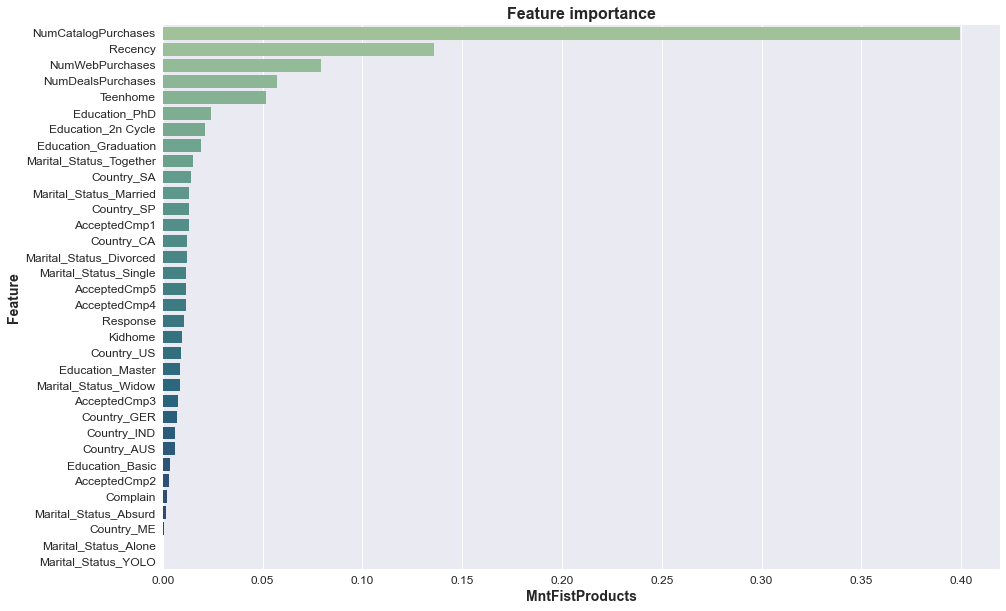

In [71]:
x_train, x_test, y_train, y_test = train_test_split(model_data, model_label, test_size = 0.15, random_state = 42)

rf_regressor = RandomForestRegressor(random_state = 1)
rf_model = rf_regressor.fit(x_train,y_train)
y_rfpred = rf_model.predict(x_test)
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = x_train.columns,
                                    columns = ['importance']).sort_values('importance', ascending = False)
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = feature_importances['importance'].values, y = feature_importances['importance'].index, palette ='crest')
plt.xlabel('MntFistProducts', fontsize = 14, fontweight = 'bold')
plt.ylabel('Feature', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Feature importance', fontsize = 16, fontweight = 'bold')
plt.show()

# Section 3: Data Visualization

### Question: Which marketing campaign is most successful?

Because a succesful campaign is based on the acceptance rate, hence we calculate the acceptance rate for each campaign. The method is that we use the total accept ticks (which is 1), then divide to the total ticks of each campaign.

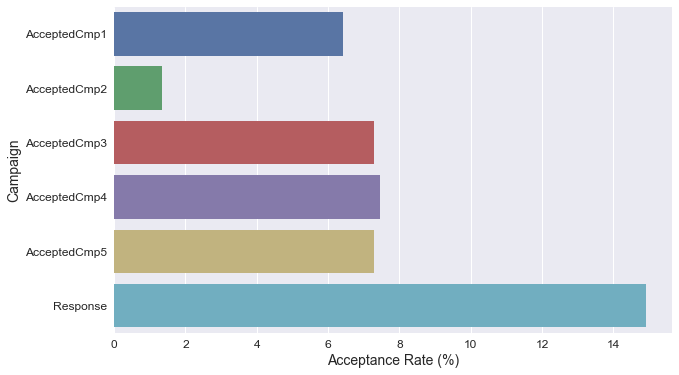

In [75]:
succesful_campaign_rate = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean() * 100
sns.barplot(x = succesful_campaign_rate.values, y = succesful_campaign_rate.index)
plt.xlabel('Acceptance Rate (%)', fontsize = 14)
plt.ylabel('Campaign', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

The latest campaign, **Response**, has the highest value in the acceptance rate, which is why it is the most succesful campaign

### Question: Which products are performing best?

In order to know this, we also calculate the average spend of customers in each product.

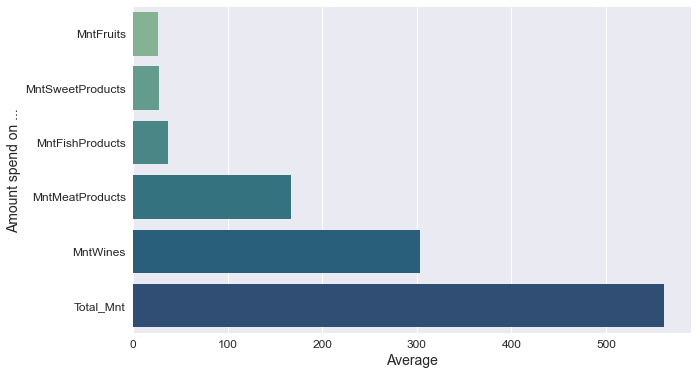

In [96]:
avg_spend_on_product = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
avg_spend_on_product['Total_Mnt'] = avg_spend_on_product.sum(axis = 1)
avg_spending = round(avg_spend_on_product.mean().sort_values(), 2)
sns.barplot(x = avg_spending.values, y = avg_spending.index, palette = 'crest')
plt.xlabel('Average', fontsize = 14)
plt.ylabel('Amount spend on ...', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

**Wines** and **Meat** have the top performance.